In [33]:
# 2019-July - Concrete Deluge
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
# import gmaps.geojson_geometries
import numpy as np
from numpy import matrix
import requests
from pprint import pprint
import time
import json
import os
from scipy.stats import linregress, sem, ttest_ind, stats
import seaborn as sns
#import plotly.graph_objects as go

# Google developer API key
from api_keys import api_key, gkey
# from config import gkey

# Configure gmaps
# gmaps.configure(api_key=gkey)

In [15]:
#Load building permit data from https://www.census.gov/construction/bps/

build_permits = pd.read_csv("CensusBuildingPermitsCum2000_2018.csv")

build_permits.head()

,Year,Units,Value (000),Value (Billions),Cumulative
0,2000,35900,"4,207,090",4.21,4.21
1,2001,37569,"4,440,651",4.44,8.65
2,2002,47037,"5,146,453",5.15,13.79
3,2003,56571,"5,939,092",5.94,19.73
4,2004,56036,"6,499,425",6.50,26.23


In [16]:
#Load compaction data from USGS https://www.sciencebase.gov/catalog/item/5cd30a76e4b09b8c0b7a5cb3

avecompaction = pd.read_csv("Toalave_compbyyear.csv")

avecompaction

,Year,Total Ave
0,2000,-1.294777
1,2001,-1.304949
2,2002,-1.313009
3,2003,-1.319282
4,2004,-1.311744
5,2005,-1.311581
6,2006,-1.330068
7,2007,-1.318957
8,2008,-1.322852
9,2009,-1.347239


In [17]:
#Pull relevant data out of dataframes to plot
years = build_permits.iloc[:,0]
values = build_permits.iloc[:,4]
units = build_permits.iloc[:,1]
subsidence = avecompaction.iloc[:,1]


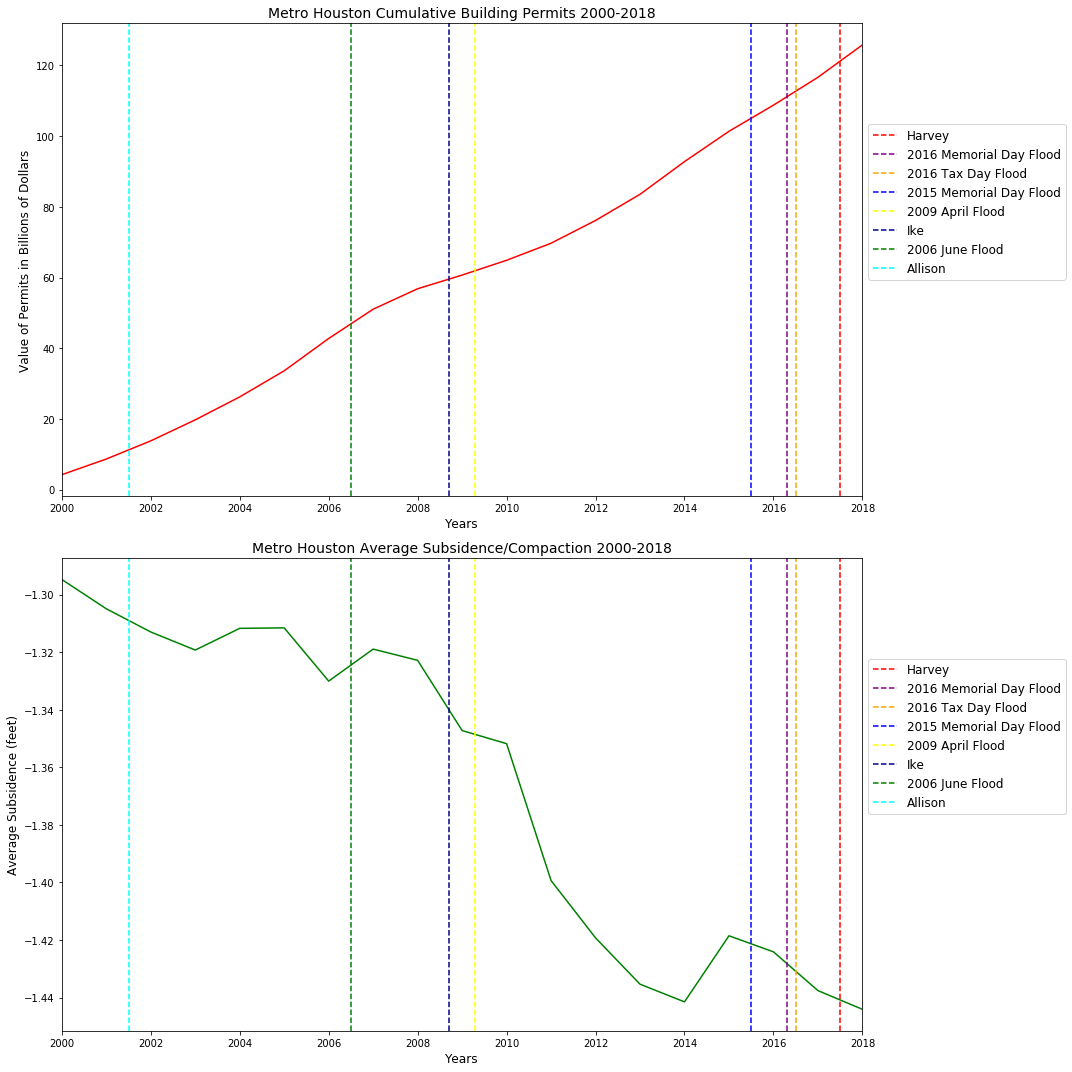

In [18]:
plt.figure(figsize=(15, 15))

#Plot building permit values by year from https://www.census.gov/construction/bps/ for the Metropolitan region of Houston 26420
# and significant flooding events per Harris County Flood Control District (HCFCD)https://www.hcfcd.org/media/2381/historytimeline-24x36-1.pdf

plt.subplot(2, 1, 1)
plt.plot(years, values, 'r')
plt.axvline(x=2017.5,linestyle='--', color='red',label='Harvey')
plt.axvline(x=2016.3,linestyle='--', color='purple',label='2016 Memorial Day Flood')
plt.axvline(x=2016.5,linestyle='--', color='orange',label='2016 Tax Day Flood')
plt.axvline(x=2015.5,linestyle='--', color='blue',label='2015 Memorial Day Flood')
plt.axvline(x=2009.3,linestyle='--', color='yellow',label='2009 April Flood')
plt.axvline(x=2008.7,linestyle='--', color='darkblue',label='Ike')
plt.axvline(x=2006.5,linestyle='--', color='green',label='2006 June Flood')
plt.axvline(x=2001.5,linestyle='--', color='cyan',label='Allison')

plt.legend(loc='best', fontsize=12, bbox_to_anchor=(1, .8))
plt.title('Metro Houston Cumulative Building Permits 2000-2018',fontsize=14)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Value of Permits in Billions of Dollars",fontsize=12)
plt.xlim(2000, 2018)

#Plot compaction/subsidence by year obtained form USGS https://www.sciencebase.gov/catalog/item/5cd30a76e4b09b8c0b7a5cb3
#and significant flooding events per Harris County Flood Control District (HCFCD) https://www.hcfcd.org/media/2381/historytimeline-24x36-1.pdf
plt.subplot(2, 1, 2)
plt.plot(years, subsidence, 'g')
plt.axvline(x=2017.5,linestyle='--', color='red',label='Harvey')
plt.axvline(x=2016.3,linestyle='--', color='purple',label='2016 Memorial Day Flood')
plt.axvline(x=2016.5,linestyle='--', color='orange',label='2016 Tax Day Flood')
plt.axvline(x=2015.5,linestyle='--', color='blue',label='2015 Memorial Day Flood')
plt.axvline(x=2009.3,linestyle='--', color='yellow',label='2009 April Flood')
plt.axvline(x=2008.7,linestyle='--', color='darkblue',label='Ike')
plt.axvline(x=2006.5,linestyle='--', color='green',label='2006 June Flood')
plt.axvline(x=2001.5,linestyle='--', color='cyan',label='Allison')
plt.legend(loc='best', fontsize=12, bbox_to_anchor=(1, .8))

plt.title('Metro Houston Average Subsidence/Compaction 2000-2018',fontsize=14)
plt.ylabel('Average Subsidence (feet)',fontsize=12)
plt.xlabel("Years",fontsize=12)
plt.xlim(2000, 2018)
plt.tight_layout()
plt.savefig("../permitsvscompaction.png")
plt.show()

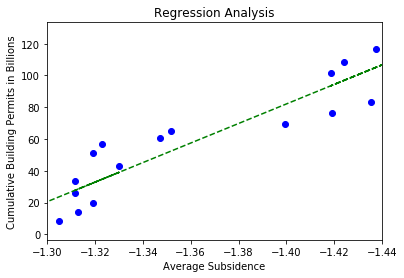

Ttest_indResult(statistic=-7.232248930854358, pvalue=9.996153518531865e-07)

In [19]:
#Perform regression analysis of the cumulative building permits and subsidence
fig, ax = plt.subplots()

(slope, intercept, _, _, _) = linregress(subsidence, values)
fit = slope * subsidence + intercept
ax.plot(subsidence, fit,'g--')
ax.scatter(subsidence, values, color = 'blue')
ax.set_xlabel('Average Subsidence')
ax.set_ylabel('Cumulative Building Permits in Billions')

plt.xlim(-1.3,-1.44)

plt.title('Regression Analysis')
plt.show()

stats.ttest_ind(subsidence, values, equal_var=False)

In [22]:
#Import USGS compacition data (original file of added measurements by the year)
fileone=("USGS_compaction_data.csv")
soil_data=pd.read_csv(fileone,encoding='utf-8')
soil_data.head()

,Year,Addicks,Texas City,Southwest,Seabrook,Pasadena,Northeast,Lake Houston,Johnson Space City,East End,Clear Lake Shallow,Clearlake deep,Baytown Shallow,Baytown Deep
0,2000,3.127917,0.094615,1.529692,1.532769,0.302462,0.863308,0.551308,2.338077,1.312846,0.675615,0.685538,0.537154,0.962000
1,2001,3.202769,0.096846,1.530385,1.511154,0.329000,0.868077,0.552538,2.339692,1.314077,0.682846,0.693308,0.534077,0.988692
2,2002,3.295077,0.094000,1.528538,1.509462,0.314923,0.868385,0.557231,2.336231,1.313231,0.680385,0.691308,0.522154,0.959308
3,2003,3.374923,0.092154,1.532154,1.500692,0.296462,0.867462,0.563077,2.335077,1.311538,0.676154,0.680231,0.517154,0.938769
4,2004,3.400154,0.094538,1.506692,1.491846,0.267615,0.847462,0.555231,2.336000,1.306154,0.675923,0.682231,0.502769,0.919615


In [23]:
#Average compaction by area/region: 
addicks=soil_data["Addicks"].mean()
texas_city=soil_data["Texas City"].mean()
southwest=soil_data["Southwest"].mean()
seabrook=soil_data["Seabrook"].mean()
pasadena=soil_data["Pasadena"].mean()
northeast=soil_data["Northeast"].mean()
lakehouston=soil_data['Lake Houston'].mean()
spacecity=soil_data['Johnson Space City'].mean()
eado=soil_data['East End'].mean()
Countymeans=[addicks, texas_city,southwest, seabrook, pasadena, northeast, lakehouston, spacecity, eado]
Counties=["Addicks", "Texas City", 'Southwest', 'Seabrook', 'Pasadena', 'Northeast', 'Lake Houston', 'Johnson Space City','EADO']
Zipcode=[77494,77590,77044,77586,77502,77073,77532,77058,77002]
Lat=[29.740677,29.391397,29.906616, 29.583816, 29.679518, 29.999166,29.932872, 29.561579,29.756845]
Lng=[ -95.829652,-94.920149,-95.180608,-95.036166,-95.199783, -95.400119,-95.057187,-95.099626, -95.365652 ]
Soil_means=pd.DataFrame({"County":Counties, "Zipcodes":Zipcode,"Lat":Lat, "Lng":Lng,"Average Compaction(ft)":Countymeans})
Soil_means

,County,Zipcodes,Lat,Lng,Average Compaction(ft)
0,Addicks,77494,29.740677,-95.829652,3.506481
1,Texas City,77590,29.391397,-94.920149,0.096358
2,Southwest,77044,29.906616,-95.180608,1.590291
3,Seabrook,77586,29.583816,-95.036166,1.527237
4,Pasadena,77502,29.679518,-95.199783,0.378327
5,Northeast,77073,29.999166,-95.400119,0.878826
6,Lake Houston,77532,29.932872,-95.057187,0.581543
7,Johnson Space City,77058,29.561579,-95.099626,2.406221
8,EADO,77002,29.756845,-95.365652,1.324833


In [24]:
#USGS total compacition ave. data:
comp_two=("Toalave_compbyyear.csv")
compave=pd.read_csv(comp_two,encoding='utf-8')
compave.head()
compaction_ave=compave.rename(columns={"Total Ave":"Total Average"})
compaction_ave.head()

,Year,Total Average
0,2000,-1.294777
1,2001,-1.304949
2,2002,-1.313009
3,2003,-1.319282
4,2004,-1.311744


In [25]:
#Importing construction permit data 
permit_file="CensusBuildingPermitsCum2000_2018.csv"
permits=pd.read_csv(permit_file)
permits

,Year,Units,Value (000),Value (Billions),Cumulative
0,2000,35900,"4,207,090",4.21,4.21
1,2001,37569,"4,440,651",4.44,8.65
2,2002,47037,"5,146,453",5.15,13.79
3,2003,56571,"5,939,092",5.94,19.73
4,2004,56036,"6,499,425",6.50,26.23
5,2005,62125,"7,376,807",7.38,33.61
6,2006,71719,"9,137,366",9.14,42.75
7,2007,63274,"8,291,959",8.29,51.04
8,2008,42728,"5,785,367",5.79,56.82
9,2009,27326,"3,869,594",3.87,60.69


In [26]:
#Merge data files by year to plot data together 
usgs_permit_merge=pd.merge(compaction_ave, permits, on="Year", how="outer")
usgs_permit_merge.head()

,Year,Total Average,Units,Value (000),Value (Billions),Cumulative
0,2000,-1.294777,35900,"4,207,090",4.21,4.21
1,2001,-1.304949,37569,"4,440,651",4.44,8.65
2,2002,-1.313009,47037,"5,146,453",5.15,13.79
3,2003,-1.319282,56571,"5,939,092",5.94,19.73
4,2004,-1.311744,56036,"6,499,425",6.50,26.23


In [28]:
#Importing rain data 
rain_file="precipitation.csv"
rain=pd.read_csv(rain_file)
rain

,Year,Precipitation (in)
0,2000,53.62
1,2001,71.18
2,2002,59.71
3,2003,45.76
4,2004,65.06
5,2005,41.21
6,2006,57.86
7,2007,65.52
8,2008,53.00
9,2009,47.01


In [34]:
#create data frame of average compaction, permit value, and precipitation to determine any correlation
matrix=pd.DataFrame({"Total Average":matrix_df["Total Average"],
                     #"Units":matrix_df["Units"],
                     "Total Permit $":matrix_df["Cumulative"],
                     "Precipitation":matrix_df["Precipitation (in)"]})
matrix.head()

,Total Average,Total Permit $,Precipitation
0,-1.294777,4.21,53.62
1,-1.304949,8.65,71.18
2,-1.313009,13.79,59.71
3,-1.319282,19.73,45.76
4,-1.311744,26.23,65.06


In [35]:
matrix_df=pd.merge(usgs_permit_merge,rain, on="Year", how="outer" )
matrix_df

,Year,Total Average,Units,Value (000),Value (Billions),Cumulative,Precipitation (in)
0,2000,-1.294777,35900,"4,207,090",4.21,4.21,53.62
1,2001,-1.304949,37569,"4,440,651",4.44,8.65,71.18
2,2002,-1.313009,47037,"5,146,453",5.15,13.79,59.71
3,2003,-1.319282,56571,"5,939,092",5.94,19.73,45.76
4,2004,-1.311744,56036,"6,499,425",6.50,26.23,65.06
5,2005,-1.311581,62125,"7,376,807",7.38,33.61,41.21
6,2006,-1.330068,71719,"9,137,366",9.14,42.75,57.86
7,2007,-1.318957,63274,"8,291,959",8.29,51.04,65.52
8,2008,-1.322852,42728,"5,785,367",5.79,56.82,53.00
9,2009,-1.347239,27326,"3,869,594",3.87,60.69,47.01


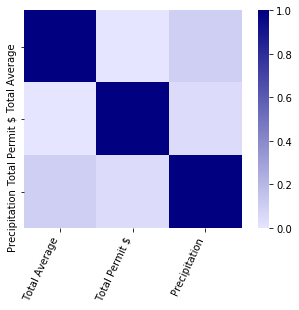

In [36]:
#correlation matrix: Compaction and permit data 
compandpermit = matrix.corr()
ax = sns.heatmap(
    compandpermit, 
    vmin=0, vmax=1, #center=0,
    cmap=sns.light_palette("navy", as_cmap=True),
    square=True)


ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=65,
    horizontalalignment='right');

In [37]:
#Get Harvey damage information for Houston area to determine if there is a relationship between compaction and damage
#Called FEMA API referenced below

# REFERENCE LINK FOR COLUMN DEFINITION
# https://www.fema.gov/openfema-dataset-individual-assistance-housing-registrants-large-disasters-v1


print("FEMA DataSet : Individual Assistance Housing Registrants Large Disasters")
# FEMA Data | KINGWOOD Repair Amount > 25000 | 422 rows
url_houston = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27HOUSTON%27%20and%20repairAmount%20gt%2025000"
url_humble = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27HUMBLE%27%20and%20repairAmount%20gt%2025000"
url_katy = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27KATY%27%20and%20repairAmount%20gt%2025000"
url_kingwood = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27KINGWOOD%27%20and%20repairAmount%20gt%2025000"
url_pearland = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27PEARLAND%27%20and%20repairAmount%20gt%2025000"
url_spring = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27SPRING%27%20and%20repairAmount%20gt%2025000"

#url_spring1 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777373%27%20and%20repairAmount%20gt%2025000"
#url_spring2 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777389%27%20and%20repairAmount%20gt%2025000"
#url_spring3 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777388%27%20and%20repairAmount%20gt%2025000"
#url_spring4 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777379%27%20and%20repairAmount%20gt%2025000"
#url_spring5 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777386%27%20and%20repairAmount%20gt%2025000"

url_sugarland1 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777478%27%20and%20repairAmount%20gt%2025000"
url_sugarland2 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777479%27%20and%20repairAmount%20gt%2025000"
url_sugarland3 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777487%27%20and%20repairAmount%20gt%2025000"
url_sugarland4 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777496%27%20and%20repairAmount%20gt%2025000"
url_sugarland5 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777498%27%20and%20repairAmount%20gt%2025000"

url_woodlands = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27THE%20WOODLANDS%27%20and%20repairAmount%20gt%2025000"
url_friendswoods = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27FRIENDSWOOD%27%20and%20repairAmount%20gt%2025000"

print(" ")
print("Calling APIs...")

houston = requests.get(url_houston).json()
humble = requests.get(url_humble).json()
katy = requests.get(url_katy).json()
kingwood = requests.get(url_kingwood).json()
pearland = requests.get(url_pearland).json()
spring = requests.get(url_spring).json()

sugarland1 = requests.get(url_sugarland1).json()
sugarland2 = requests.get(url_sugarland2).json()
sugarland3 = requests.get(url_sugarland3).json()
sugarland4 = requests.get(url_sugarland2).json()
sugarland5 = requests.get(url_sugarland3).json()

woodlands = requests.get(url_woodlands).json()
friendswood = requests.get(url_friendswoods).json()

print(" ")
print("Creating DataFrames & Populating DataFrames")

df_houston = pd.DataFrame(houston["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_humble = pd.DataFrame(humble["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_katy = pd.DataFrame(katy["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_kingwood = pd.DataFrame(kingwood["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_pearland = pd.DataFrame(pearland["IndividualAssistanceHousingRegistrantsLargeDisasters"])

df_sugarland1 = pd.DataFrame(sugarland1["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland2 = pd.DataFrame(sugarland2["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland3 = pd.DataFrame(sugarland3["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland4 = pd.DataFrame(sugarland2["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland5 = pd.DataFrame(sugarland3["IndividualAssistanceHousingRegistrantsLargeDisasters"])
#df_sugarland = pd.DataFrame(sugarland["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_woodlands = pd.DataFrame(woodlands["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_friendswood = pd.DataFrame(friendswood["IndividualAssistanceHousingRegistrantsLargeDisasters"])

# Consolidate FEMA CITY NAME that won't pull by damageCity
df_spring = pd.DataFrame(spring["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland = pd.concat([df_sugarland1, df_sugarland2, df_sugarland3, df_sugarland4, df_sugarland5])

print(" ")
print("FEMA DataSet : Individual Assistance Housing Registrants Large Disasters | Repair Amount > 25000")
print("Repair Amount > 25000 for the cities of: Houston, Humble, Katy, Pearland, Spring, Sugarland, The Woodlands & Friendswood.")
print("Data Ready...")

FEMA DataSet : Individual Assistance Housing Registrants Large Disasters
 
Calling APIs...


JSONDecodeError: Expecting value: line 1 column 562 (char 561)

In [122]:
#Create data frame for claim counts and repair amounts by area

#df_data = pd.DataFrame(columns=['Houston', 'Humble', 'Katy', 'Kingwood', 'Pearland', 'Sugarland', 'Woodlands', 'Friendswood'])
#df_repairAmount = pd.DataFrame(columns=['Area','Claim Count > $25000.00', 'FEMA | Real Property Damage > $25000.00'])
df_repairAmount = pd.DataFrame(columns=['Area','Claim Count > $25000.00', 'Repair Amount > $25000.00'])

# repairAmount :
df_repairAmount["Area"] = ['Houston', 'Humble', 'Katy', 'Kingwood', 'Pearland','Spring', 'Sugarland', 'The Woodlands','Friendswood']
df_repairAmount["Claim Count > $25000.00"] = [df_houston['repairAmount'].count(), df_humble['repairAmount'].count(), df_katy['repairAmount'].count(), df_kingwood['repairAmount'].count(), df_pearland['repairAmount'].count(), df_spring['repairAmount'].count(), df_sugarland['repairAmount'].count(),  df_woodlands['repairAmount'].count(), df_friendswood['repairAmount'].count()]
df_repairAmount["Repair Amount > $25000.00"] = [df_houston['repairAmount'].sum(), df_humble['repairAmount'].sum(), df_katy['repairAmount'].sum(), df_kingwood['repairAmount'].sum(), df_pearland['repairAmount'].sum(), df_spring['repairAmount'].sum(), df_sugarland['repairAmount'].sum(), df_woodlands['repairAmount'].sum(), df_friendswood['repairAmount'].sum()]

df_repairAmount

,Area,Claim Count > $25000.00,Repair Amount > $25000.00
0,Houston,1000,27837777.20
1,Humble,208,6147811.57
2,Katy,261,7409494.68
3,Kingwood,422,12596717.61
4,Pearland,32,911365.64
5,Spring,219,6440844.72
6,Sugarland,42,1168464.38
7,The Woodlands,3,90690.39
8,Friendswood,127,3660969.63


In [127]:
# Create a Heatmap layer to show compaction rates in Houston areas by zip code using gmaps

locations2=Soil_means[['Lat','Lng']].astype('float')

#locations=(77494,77590,77044,77586,77502,77073,77532,77058,77002)
c=Soil_means['Average Compaction(ft)'].astype('float')
compaction=c


fig = gmaps.figure()
compaction_layer = gmaps.heatmap_layer(locations2, weights=compaction, 
                                 dissipating=False, max_intensity=-100,
                                 point_radius = .11, gradient=[(90, 150, 210,0.1),
                                                              (0,0,255,0.8),
                                                              (0,0,0,1)])
# Display figure
fig.add_layer(compaction_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [128]:
#Site wells latitude and longitudes for mapping as well as compaction ratio to show degree of compaction on map for each area

site_wells = [
    {'name': 'Addicks', 'location': (29.740677,-95.829652), 'compaction_ratio': 3.506481},
    {'name': 'Texas City', 'location': (29.391397,-94.920149), 'compaction_ratio': 0.096358},
    {'name': 'North East', 'location': (29.906616,-95.180608), 'compaction_ratio': 1.590291},
    {'name': 'Seabrook', 'location': (29.583816,-95.036166), 'compaction_ratio': 1.527237},
    {'name': 'Pasadena', 'location': (29.679518,-95.199783), 'compaction_ratio': 0.378327},
    {'name': 'North Central', 'location': (29.999166,-95.400119), 'compaction_ratio': 0.878826},
    {'name': 'Lake Houston', 'location': (29.932872,-95.057187), 'compaction_ratio': 00.581543},
    {'name': 'Johnson Space City', 'location': (29.561579,-95.099626), 'compaction_ratio': 2.406221},
    {'name': 'EADO', 'location': (29.756845,-95.365652), 'compaction_ratio': 1.324833},
]
locations2=Soil_means[['Lat','Lng']].astype('float')
site_locations = [site['location'] for site in site_wells]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Average Compaction ( ft )</dt><dd>{compaction_ratio}</dd>
</dl>
"""
site_info = [info_box_template.format(**site) for site in site_wells]


In [129]:
# Import Zipcodes from compaction data to correlate to Harvey damage data
# A csv file of zip codes of the site wells with compaction data was created to use for the Harvey damage dataframe
df_zipcodes = pd.DataFrame(columns=['Zipcode','Lattitude','Longitude'])
df_zipcodes = pd.read_csv('zipcodes.csv')

In [130]:
#Create map of Harvey damage with points of compaction (site wells) and degree of compaction with markers and callout boxes.
# click on markers to see callout boxes with compaction and damage data

# https://jupyter-gmaps.readthedocs.io/en/latest/api.html

# Create aiport dataframe
compiledDamagedZipCodes_df = pd.DataFrame(columns=['damagedZipCode','count', 'lattitude','longitude'])
compiledDamagedZipCodes_df = pd.read_csv('compiledDamagedZipCodes.csv')


# Store latitude and longitude in locations
locations = compiledDamagedZipCodes_df[["lattitude", "longitude"]]

# Fill NaN values and convert to float
rating = compiledDamagedZipCodes_df["count"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating/1, dissipating=False, max_intensity=250, point_radius = 250)

markers = gmaps.marker_layer(locations2)
marker_layer2 = gmaps.marker_layer(site_locations, info_box_content=site_info)
# Add the layer to the map

fig.add_layer(heat_layer)
fig.add_layer(compaction_layer)
fig.add_layer(markers)
fig.add_layer(marker_layer2)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))